# EDA for the DNA gene family dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dna_seq = pd.read_csv("./dna_seq_families.csv")
dna_seq.head()

,dna_sequence,gene_family
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Remove the duplicate rows


In [4]:
dna_seq = dna_seq.drop_duplicates()
print("Size after removing duplicates:", dna_seq.shape[0])


Size after removing duplicates: 3629


### Statistics about the sequences length

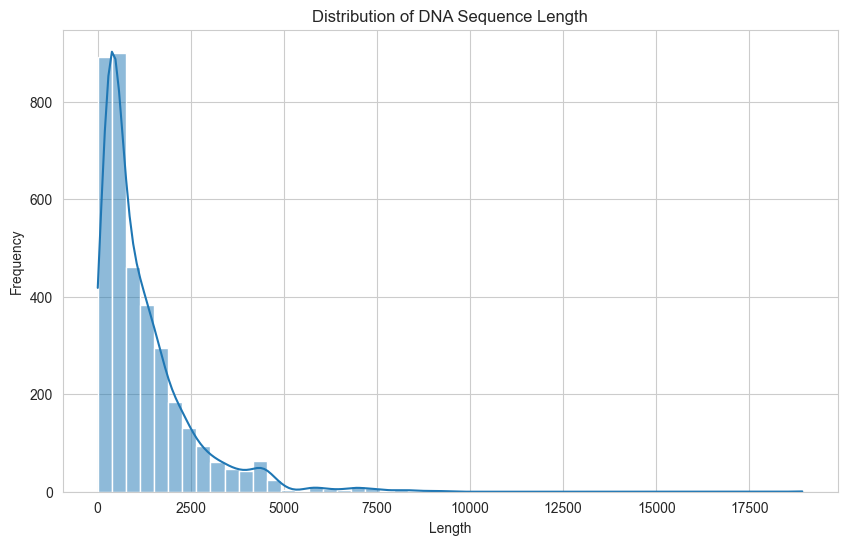

In [5]:
# create a new column with the length of the dna_sequence
dna_seq['length'] = dna_seq['dna_sequence'].apply(len)

# plot the distribution of the length of the dna_sequence
plt.figure(figsize=(10, 6))
sns.histplot(dna_seq['length'], bins=50, kde=True)
plt.title("Distribution of DNA Sequence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

#### The majority are shorter than 8000 nucleotides, but there are some long sequences.

In [6]:
# Shortest sequence length equal
dna_seq['length'].min()


np.int64(5)

In [7]:
dna_seq['length'].mode()

0    234
Name: length, dtype: int64

In [8]:
dna_seq['length'].mean()

np.float64(1217.8142739046568)

### Checking class imbalance

In [9]:
dna_seq['gene_family'].value_counts()

gene_family
6    1109
4     590
3     570
0     446
1     408
2     291
5     215
Name: count, dtype: int64

Statistics about the nucleotides

In [10]:
# print all unique characters in the dna_sequence
unique_chars = set()
for seq in dna_seq['dna_sequence']:
    unique_chars.update(seq)
print(unique_chars)

{'C', 'T', 'A', 'G', 'N'}


In [11]:
# Count the occurrences of each character in the dna_sequence
char_counts = {}
for seq in dna_seq['dna_sequence']:
    for char in seq:
        if char in char_counts:
            char_counts[char] += 1
        else:
            char_counts[char] = 1

# Print the counts of each character
for char, count in char_counts.items():
    print(f"{char}: {count}")

A: 1120024
T: 974371
G: 1159196
C: 1165364
N: 493


Sanity check: all characters should be uppercase

In [12]:
# check if all characters are uppercase
all_upper = True
for seq in dna_seq['dna_sequence']:
    if not seq.isupper():
        all_upper = False
        break
print(all_upper)

True
